<a href="https://colab.research.google.com/github/IP-Capston-Mosaic/IP-Capston-Mosaic/blob/jeongseock/test0413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install opencv-python-headless==4.1.2.30
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm

sys_font=fm.findSystemFonts()

nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/

NameError: ignored

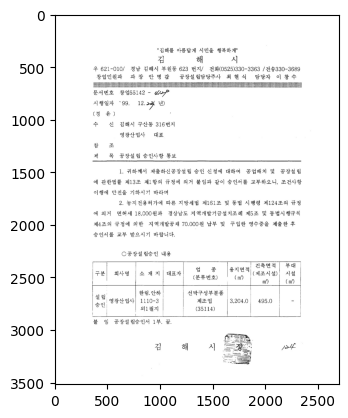

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
from easyocr import Reader
import requests
from google.colab.patches import cv2_imshow

img = cv2.imread("sample3.jpg")

alpha1 = 1.0 #명암 조정값
dst1 = np.clip((1+alpha1) * img - 128 * alpha1, 0, 255).astype(np.uint8)
plt.imshow(img)

reader = easyocr.Reader(['ko','en'])    # 인식할 언어 리스트(한국어, 영어) 지정
result = reader.readtext(image)    # 인식할 이미지(상대경로값) 지정(인식 영역 출력으로 인해 detail 요소 미삭제)

img = cv2.imread(image)

img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
font = ImageFont.truetype('gulim.ttc',15)
draw = ImageDraw.Draw(img)

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

for i in result :
    # 이미지 좌표 변수 지정
    x = i[0][0][0] 
    y = i[0][0][1] 
    w = i[0][1][0] - i[0][0][0] 
    h = i[0][2][1] - i[0][1][1]
    
    # 랜덤 색상 지정
    color_idx = random.randint(0,255)
    color = [int(c) for c in COLORS[color_idx]]

    # 이미지에 인식 영역 / 인식 문자 출력
    draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
    draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)

plt.figure(figsize=(50,50))
plt.imshow(img)
plt.show()

명암 조절하여도 이미지상 뚜렷한 차이가 없음.

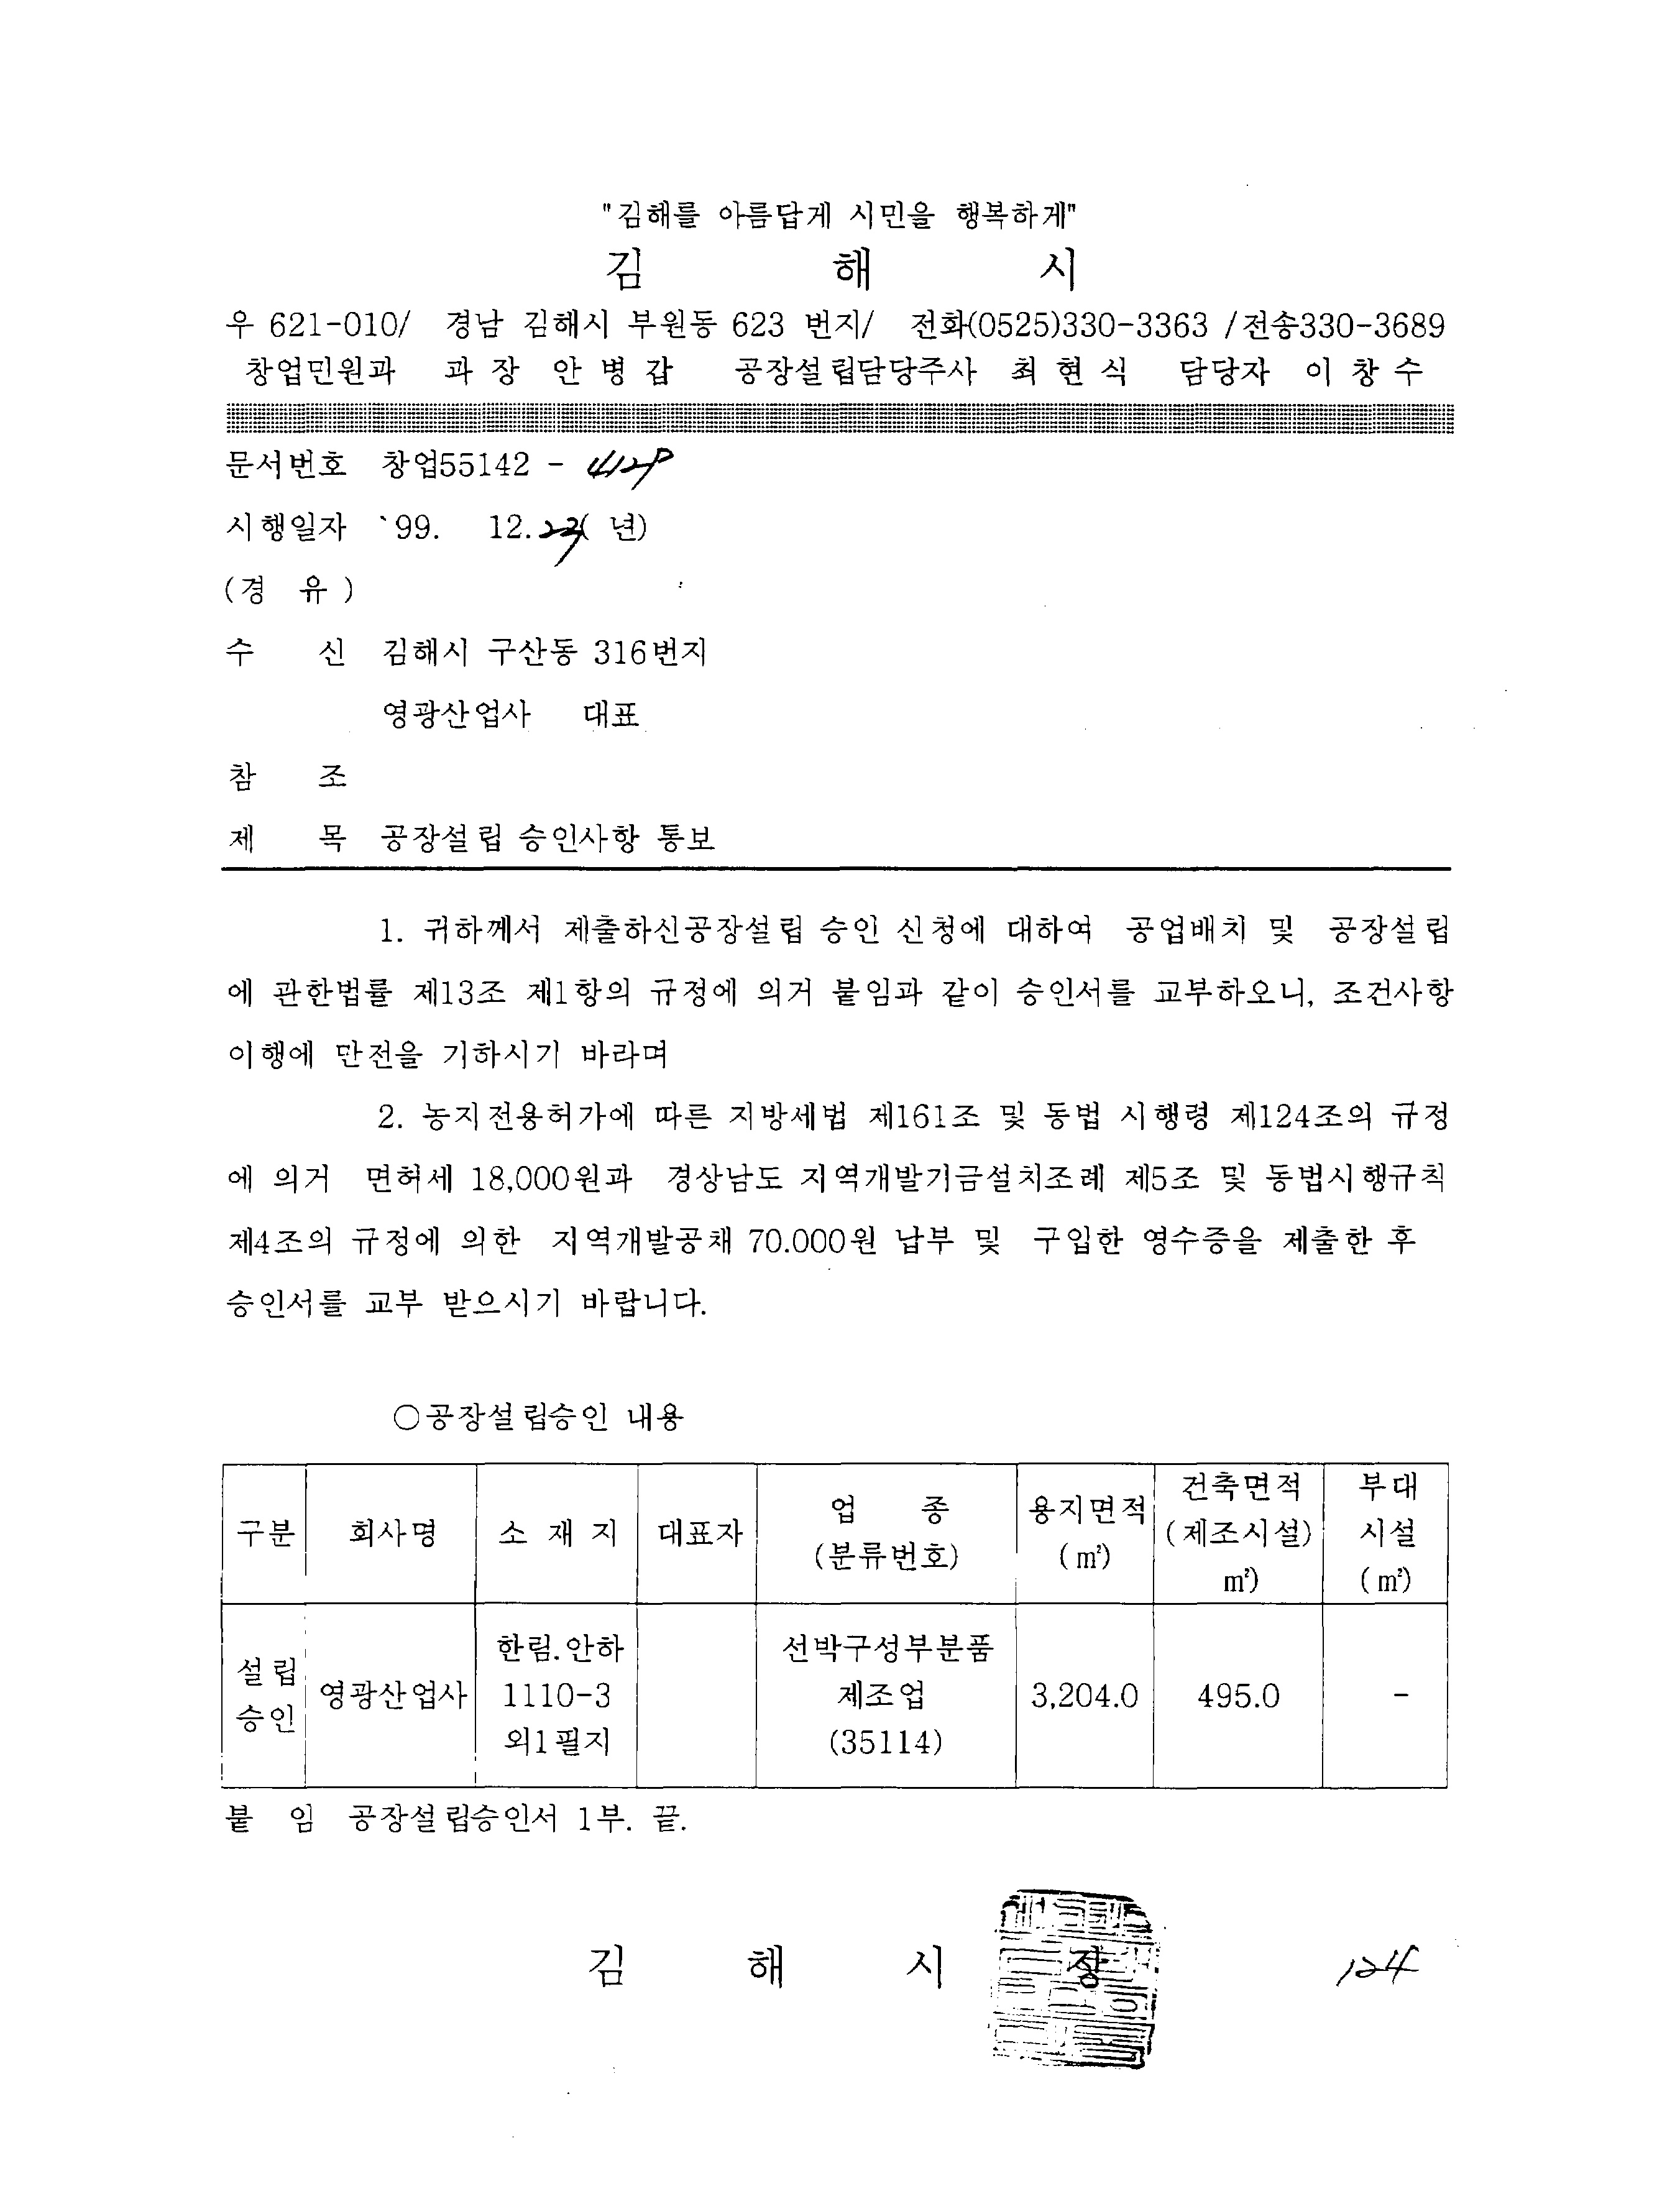